In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns



# Dataset variables Description

Variable definitions in the Dataset

Age: Age of the patient

Sex: Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp: Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps: resting blood pressure (in mm Hg)

chol: cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

_restecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

target: 0= less chance of heart attack 1= more chance of heart attack

**Symptoms of Heart attack:**

Chest pain, Arm pain, Back pain,
Asthma, Nausea, chest pain and tightness, dizziness and faintinf

# Loading the Dataset

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Initial analysis on the Dataset

In [8]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [9]:
df.columns = new_columns

In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset contains 303 rows and 14 columns

All the columns are numerical

And there is no missing values in the dataset

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
unique_number = []
for i in df.columns:
  x = df[i].value_counts().count()
  unique_number.append(x)

pd.DataFrame(unique_number, index=df.columns, columns=['Unique number'])

,Unique number
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [15]:
unique_number

[41, 2, 4, 49, 152, 2, 3, 91, 2, 40, 3, 5, 4, 2]

Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”

Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

In [16]:
num_features = ["age", "trtbps", "chol", "thalach","oldpeak"]
cat_features = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [17]:
df[num_features]

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [18]:
df[cat_features]

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


# Exploratory Data Analysis

In [19]:
df[num_features].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [20]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

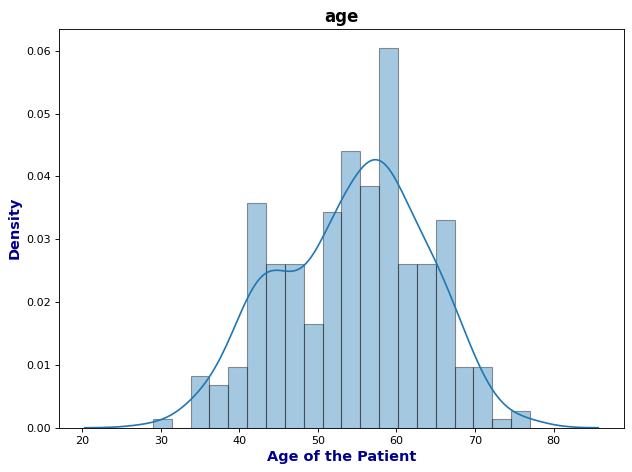

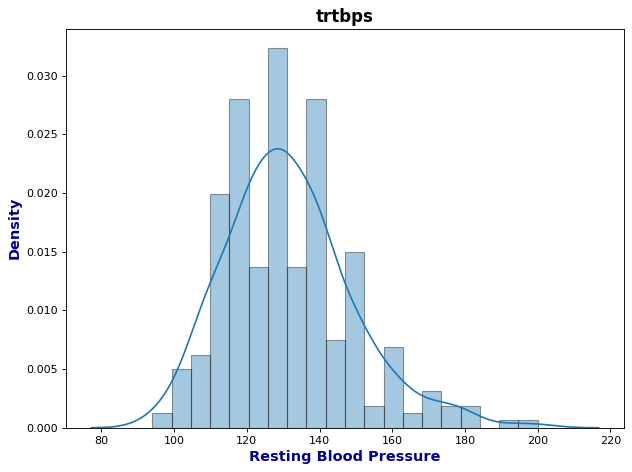

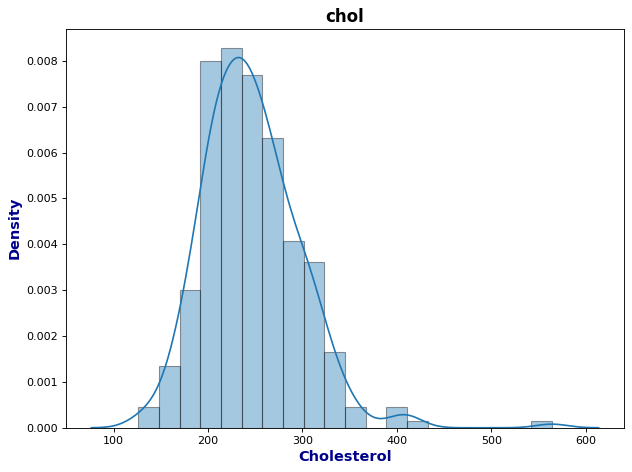

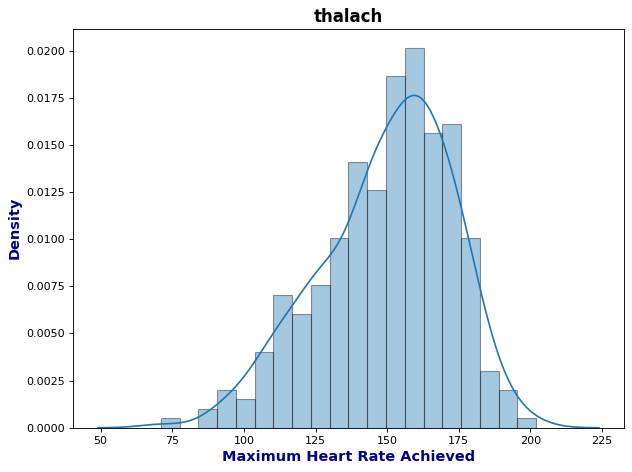

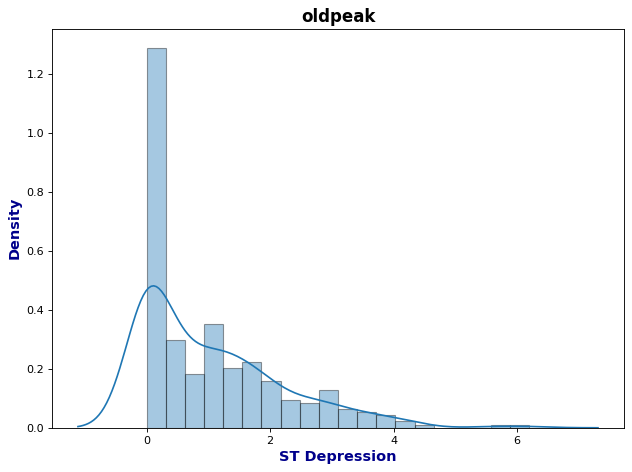

In [21]:
title_font = {"family" : "DejaVu Sans", "color" : "black", "weight" : "bold", "size" : 15}
axis_font = {"family" : "DejaVu Sans", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(num_features, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

*   The majority of patients are between the age 45 to 65.
*   The blood pressure rate is between 110 and 140. 
*   The average cholestrol is between 200 to 280.
*   The maximum heart rate for most of the patients is between 135 to 175.






In [22]:
cat_features

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [23]:
cat_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

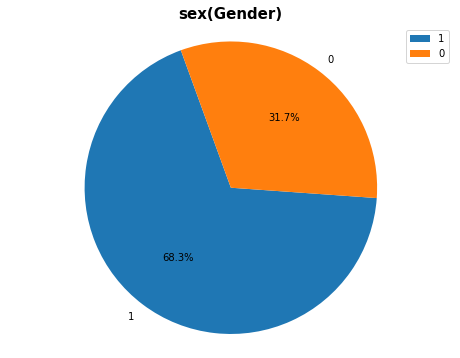

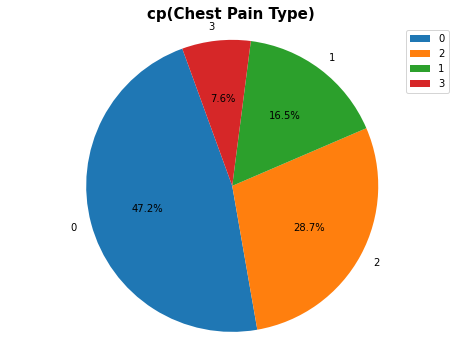

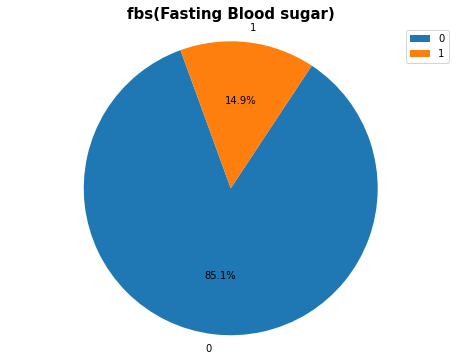

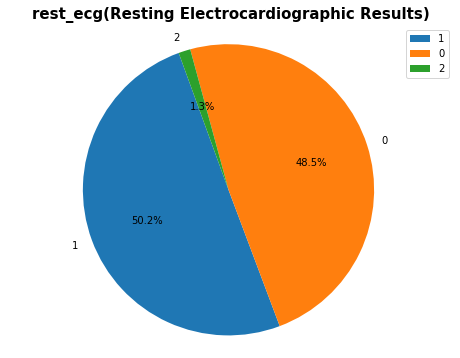

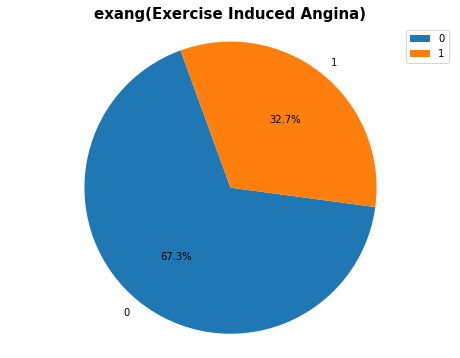

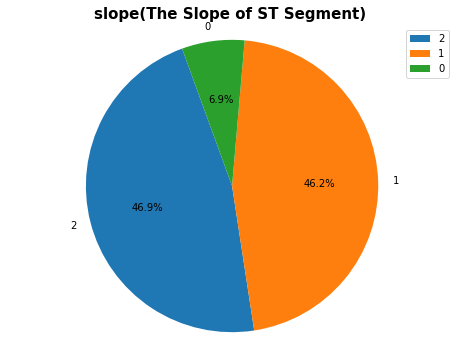

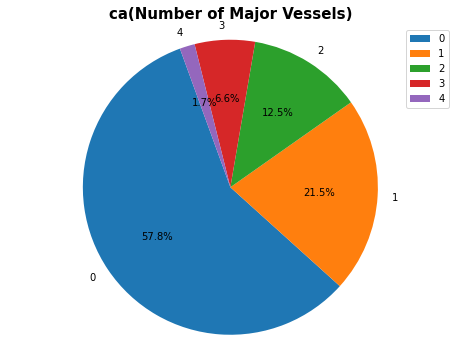

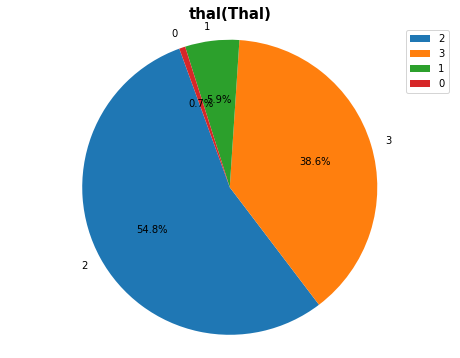

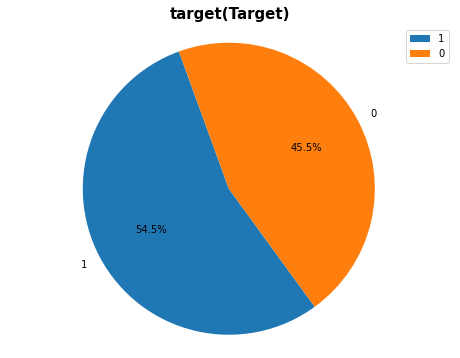

In [24]:
title_font = {"family" : "DejaVu Sans", "color" : "black", "weight" : "bold", "size" : 15}
axis_font = {"family" : "DejaVu Sans", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(cat_features, cat_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()


*   68.3 % of patients are men and 31.7% of patients are women. 
*   Chest pain type typical angina is higher than other types of pain.
*   Fasting blood is FALSE for most of the patients which is 85.1 %.
*   More than half of the patients which is 54.5 %, have a heart attact risk.




# Analysis with Target variable

Text(0.5, 1.0, 'AGE vs TARGET')

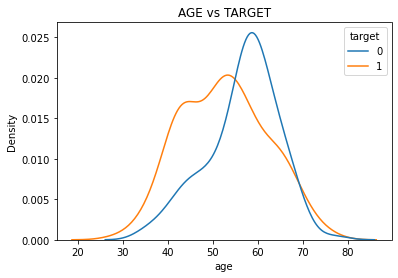

In [25]:
sns.kdeplot(df['age'], hue=df['target'])
plt.title("AGE vs TARGET")

Looks like as age increases, risk of heart attack decreases.


Text(0.5, 1.0, 'Maximum heart rate vs TARGET')

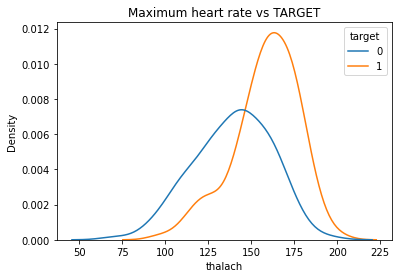

In [26]:
sns.kdeplot(df['thalach'], hue=df['target'])
plt.title("Maximum heart rate vs TARGET")

From the above plot, we can say that higher the heart rate, chances are high for the heart attack.

To summarize, a patient with thalach value 130 may not be likely to have  a risk of heart attack.

Text(0.5, 1.0, 'sex vs target')

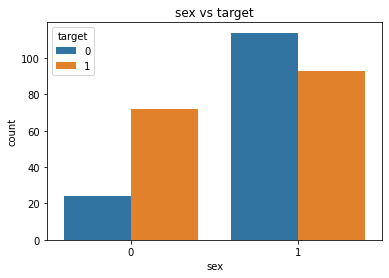

In [27]:
sns.countplot(df['sex'], hue=df['target'])
plt.title("sex vs target")

From the above plot, it looks like female patients are at higher risk for heart attack.

Text(0.5, 1.0, 'thal vs target')

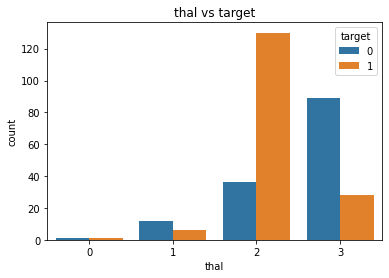

In [28]:
sns.countplot(df['thal'], hue=df['target'])
plt.title("thal vs target")

Patients with thal type 2 are at higher risk for heart attack.

# Feature encoding

In [29]:
df_new = df.copy()

In [30]:
cat_features = ['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal']

In [31]:
num_features

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [32]:
df_new = pd.get_dummies(df_new, columns = cat_features, drop_first = True)

In [33]:
df_new['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [34]:
from sklearn.preprocessing import RobustScaler

In [35]:
robust_scaler = RobustScaler()

In [36]:
df_new[num_features] = robust_scaler.fit_transform(df_new[num_features])

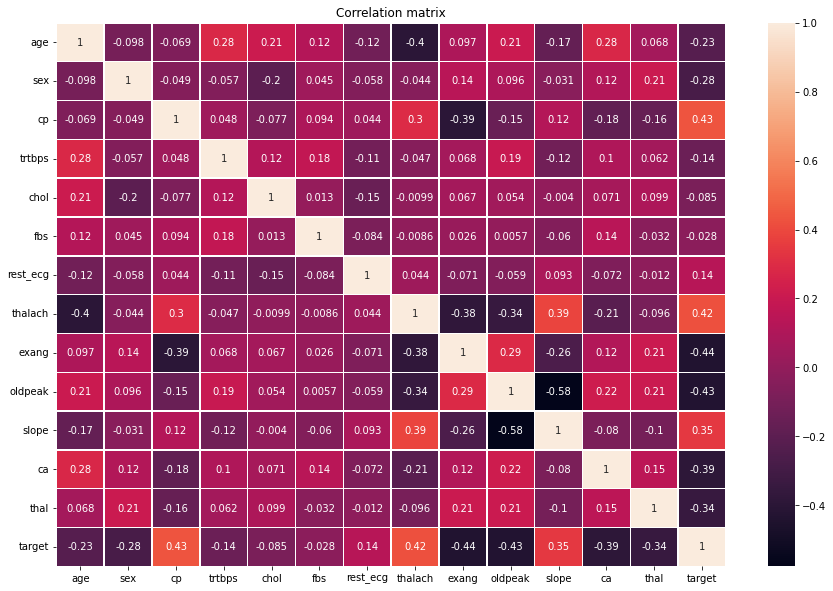

In [37]:
plt.figure(figsize = (15, 10))
plt.title("Correlation matrix")
sns.heatmap(data = df.corr(), annot = True, linewidths = 0.5)

From the above plot, we can say that cp, thalach and slope have strong correlation with the target variable.

Chol and age feature have a low positive correlation.

old peak and slope have negative correlation between them.

sex feature do not have any correlation with other features.

Rest ecg has a positive correlation of 0.14 with the target variable.

# Dataset preparation for modeling

In [38]:
X = df_new.drop(["target"], axis = 1)
y = df_new[["target"]]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((272, 22), (272, 1), (31, 22), (31, 1))

In [42]:
X_train

,age,trtbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
187,-0.074074,-0.3,0.409449,-1.353846,0.8750,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
31,0.740741,-0.5,-0.992126,-0.400000,-0.2500,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
203,0.962963,2.5,0.535433,-0.092308,0.5000,1,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
70,-0.074074,-0.5,0.283465,-0.184615,-0.2500,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
251,-0.888889,0.1,0.110236,-0.307692,-0.4375,1,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.148148,-0.3,0.330709,-0.369231,-0.3125,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
256,0.222222,-0.1,0.299213,-0.707692,1.3750,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
131,-0.444444,0.2,0.488189,0.276923,-0.5000,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
249,1.037037,0.5,0.220472,-0.215385,0.7500,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


#Modelling

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
log_reg = LogisticRegression()

In [45]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = log_reg.predict(X_test)

In [47]:
acc_score_log = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(acc_score_log))

Test Accuracy: 0.8387096774193549


### Cross validation

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
scores_log = cross_val_score(log_reg, X_test, y_test, cv = 5)
print("Cross-Validation Scores", scores_log.mean())


Cross-Validation Scores 0.738095238095238


### Grid search - logistic regression

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
log_grid = LogisticRegression()

In [52]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [53]:
log_reg_grid = GridSearchCV(log_grid, param_grid = parameters)

In [54]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [55]:
log_reg_grid.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [56]:
log_best = LogisticRegression(penalty='l2', solver='newton-cg')

In [57]:
log_best.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [58]:
y_pred = log_best.predict(X_test)

In [59]:
print("Accuracy score after hyper-parameter tuning: {}".format(accuracy_score(y_test, y_pred)))

Accuracy score after hyper-parameter tuning: 0.8387096774193549


#Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
y_pred = tree.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.7096774193548387

In [64]:
scores = cross_val_score(tree, X_test, y_test, cv = 5)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7047619047619047


Low score than logistic regression model

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier


In [66]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_pred = random_forest.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.8064516129032258

In [69]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 5)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8047619047619048


In [70]:
from sklearn.metrics import plot_roc_curve

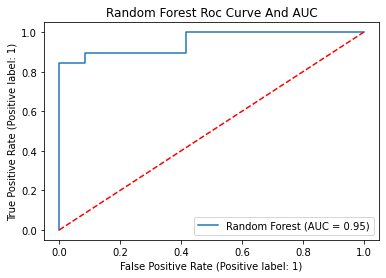

In [71]:
plot_roc_curve(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

### Grid search - Random Forest

In [72]:
random_forest_grid = RandomForestClassifier(random_state = 42)


parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}

In [73]:
rf_grid_search = GridSearchCV(random_forest_grid, param_grid = parameters)

In [74]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [75]:
rf_grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 150}

In [76]:
rf_best = RandomForestClassifier(bootstrap = False, criterion = "entropy", max_features = "auto", n_estimators = 150, random_state = 42)

In [77]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=150,
                       random_state=42)

In [78]:
y_pred = rf_best.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.8064516129032258

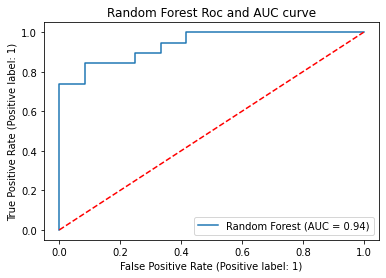

In [80]:
plot_roc_curve(rf_best, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc and AUC curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#Interpretation

In [81]:
rf_best.feature_importances_

array([0.10952849, 0.07294655, 0.08982681, 0.13072306, 0.11822467,
       0.03418304, 0.01333124, 0.03397481, 0.01700971, 0.01398617,
       0.02080907, 0.00047065, 0.05643834, 0.02176405, 0.03301958,
       0.03127592, 0.0327425 , 0.0133318 , 0.00105412, 0.00587093,
       0.07858481, 0.07090367])

Text(0.5, 0, 'Random Forest Feature Importance')

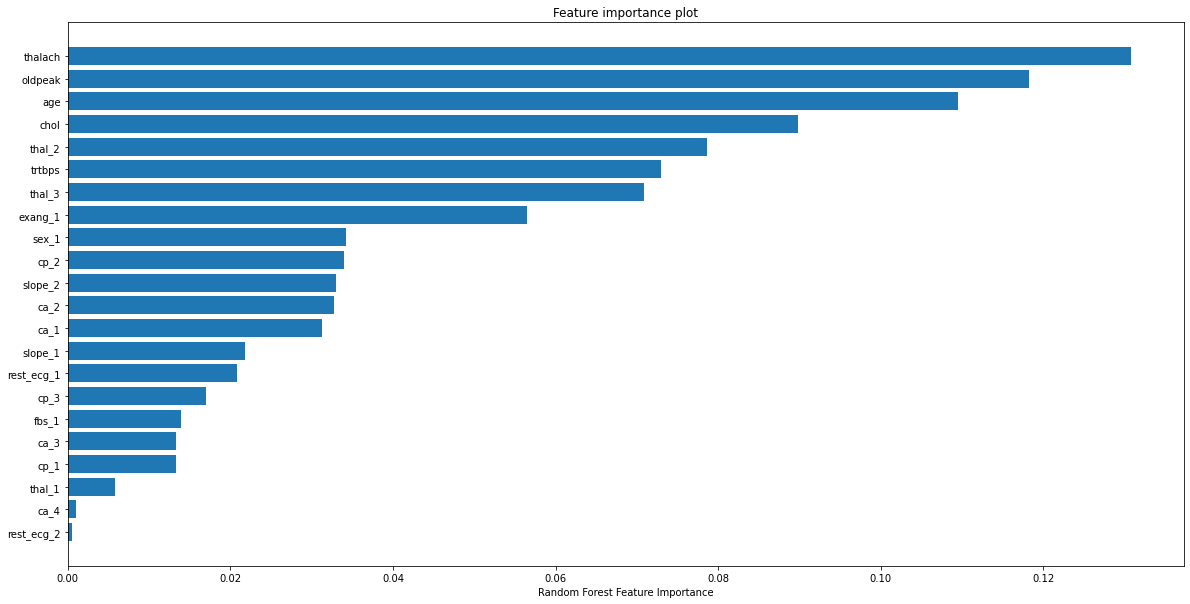

In [87]:
sorted_idx = rf_best.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(X_train.columns[sorted_idx], rf_best.feature_importances_[sorted_idx])
plt.title("Feature importance plot")
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 1.0, 'Confusion matrix')

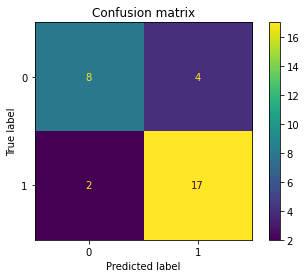

In [89]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_best, X_test, y_test)  
plt.title("Confusion matrix")

# Summary

Out of all the models, Logistic regression provided best score - 83% accuracy.

From Random forest we got, 80% accuracy and 94% AUC.

From Decision tree, we got 70% accuracy.

From interpreting the model, we can understand that, the top 5 features to predict the risk of heart attack are thalach, oldpeak, age, chol and thal.



# Recommendations

Based on the top few features predicting the risk of heart attack, doctors can advice patients based on the findings.

As a result, it will be easier to treat patients effectively and as early as possible.